<a href="https://colab.research.google.com/github/satriaabraarr/PCVK_Ganjil_2024/blob/main/Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

**Transformasi Linier Brightness**

Formula: g(x,y)=f(x,y)+b

Mengubah tingkat kecerahan citra 
---------------------------------
Masukkan nilai kecerahan: 100


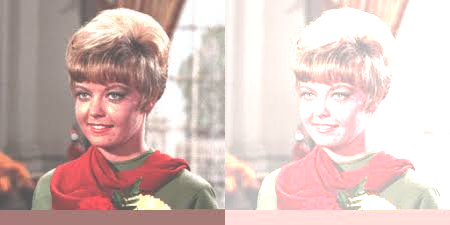

In [9]:
print("Mengubah tingkat kecerahan citra ")
print("---------------------------------")
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/image/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
        brightness_image[y,x,c] = np.clip(original [y,x,c] + brightness, 8, 255)

#cara simple tanpa for loop
#brightness_image cv.convertScaleAbs (original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

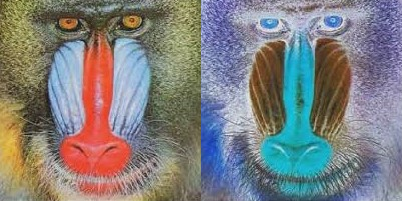

In [10]:
image = cv.imread('/content/drive/MyDrive/PCVK/image/axes.jpg')

inverse_image = 255 - image

# Menggabungkan gambar asli dan hasil inversi untuk perbandingan
final_image = cv.hconcat([image, inverse_image])

# Menampilkan hasil
cv2_imshow(final_image)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Masukkan tingkat kecerahan [-255 - 255]: 20
Masukkan kontras [1.0 - 3.0]: 2


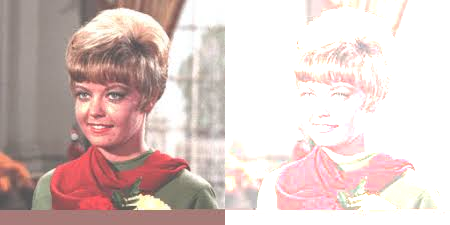

In [13]:
image = cv.imread('/content/drive/MyDrive/PCVK/image/female.jpg')

# Input nilai kontras dan kecerahan
brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))

# Melakukan transformasi kontras dan kecerahan
adjusted_image = cv.convertScaleAbs(image, alpha=contrast, beta=brightness)

# Menggabungkan gambar asli dan gambar hasil transformasi untuk perbandingan
final_image = cv.hconcat([image, adjusted_image])

# Menampilkan hasil
cv2_imshow(final_image)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:


Masukkan tingkat kecerahan (0 - 100): 50


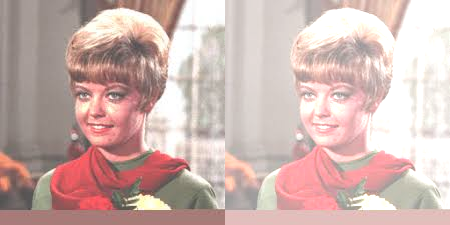

In [20]:
image = cv.imread('/content/drive/MyDrive/PCVK/image/female.jpg')

# Meminta pengguna untuk memasukkan nilai kecerahan
brightness = int(input('Masukkan tingkat kecerahan (0 - 100): '))

# Mengonversi citra ke tipe float untuk memfasilitasi operasi logaritmik
image_float = image.astype(np.float32)

# Menambahkan tingkat kecerahan dari input user
image_float = image_float + brightness

# Normalisasi citra ke rentang [0, 255]
image_float = np.clip(image_float, 0, 255) / 255.0

# Konstanta skala untuk transformasi log
c = 255 / np.log(1 + np.max(image_float))

# Aplikasikan transformasi logaritmik
log_image = c * (np.log(1 + image_float))

# Kembali ke tipe uint8 untuk ditampilkan
log_image = np.uint8(log_image * 255 / np.max(log_image))

# Menggabungkan gambar asli dan hasil transformasi log untuk perbandingan
final_image = cv.hconcat([image, log_image])

# Menampilkan hasil
cv2_imshow(final_image)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

a. Averaging

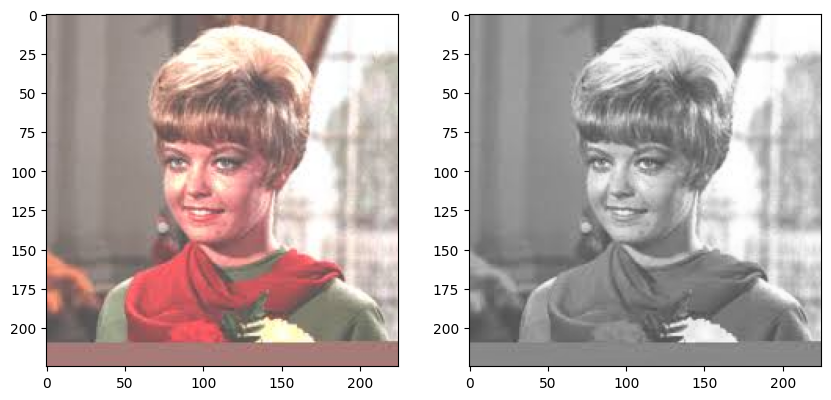

In [19]:
image = cv.imread('/content/drive/MyDrive/PCVK/image/female.jpg')

# Mengubah gambar ke tipe float32 untuk presisi
image_float = image.astype(np.float32)

# Menghitung gambar grayscale menggunakan averaging
grayscale_avg = np.mean(image_float, axis=2)

# Mengubah gambar grayscale ke tipe uint8
grayscale_avg = np.uint8(grayscale_avg)

# Mengubah ukuran gambar grayscale agar sesuai dengan ukuran gambar asli
grayscale_avg = cv.resize(grayscale_avg, (image.shape[1], image.shape[0]))

# Menyiapkan subplot
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

# Menampilkan gambar grayscale
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(grayscale_avg, cv.COLOR_GRAY2RGB))
plt.axis('on')

plt.show()

b. lightness

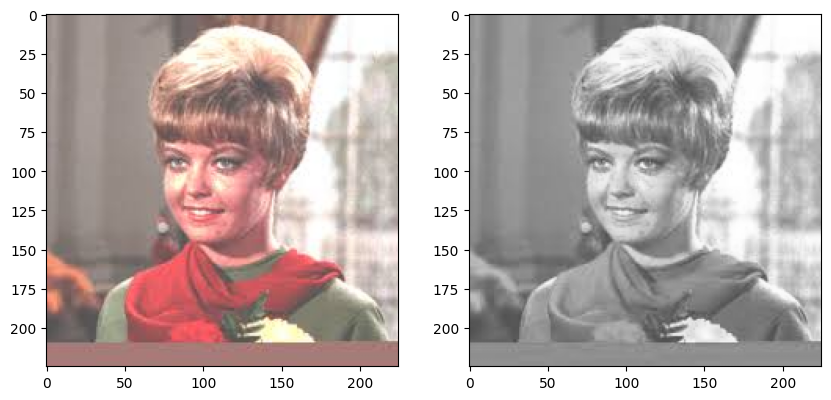

In [23]:
image = cv.imread('/content/drive/MyDrive/PCVK/image/female.jpg')

# Mengubah gambar ke tipe float32 untuk presisi
image_float = image.astype(np.float32)

# Menghitung gambar grayscale menggunakan lightness
max_channel = np.max(image_float, axis=2)
min_channel = np.min(image_float, axis=2)
grayscale_lightness = (max_channel + min_channel) / 2

# Mengubah gambar grayscale ke tipe uint8
grayscale_lightness = np.uint8(grayscale_lightness)

# Mengubah ukuran gambar grayscale agar sesuai dengan ukuran gambar asli
grayscale_lightness = cv.resize(grayscale_lightness, (image.shape[1], image.shape[0]))

# Menyiapkan subplot
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

# Menampilkan gambar grayscale
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(grayscale_lightness , cv.COLOR_GRAY2RGB))
plt.axis('on')

plt.show()

c. Luminace

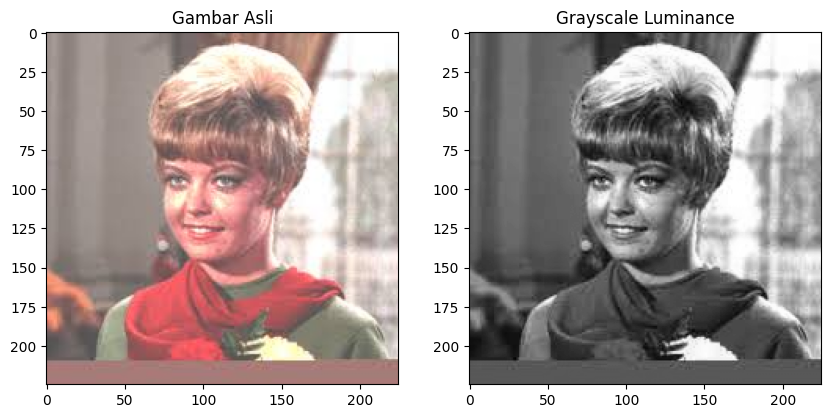

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung grayscale berdasarkan luminance
def grayscale_luminance(image):
    # Ekstraksi kanal RGB
    B, G, R = cv.split(image)

    # Menghitung luminance
    luminance = 0.299 * R + 0.587 * G + 0.114 * B

    return luminance

# Membaca gambar dari file
image = cv.imread('/content/drive/MyDrive/PCVK/image/female.jpg')
image_float = image.astype(np.float32)

# Cek apakah gambar berhasil dibaca
if image is None:
    print("Gambar tidak ditemukan!")
else:
    # Terapkan konversi grayscale berdasarkan luminance
    gray_image = grayscale_luminance(image)

    # Mengubah gambar grayscale ke tipe uint8
    gray_image = np.uint8(gray_image)

    # Menyiapkan subplot
    plt.figure(figsize=(10, 5))

    # Menampilkan gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))  # Konversi BGR ke RGB
    plt.title('Gambar Asli')
    plt.axis('on')

    # Menampilkan gambar grayscale
    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')  # Menampilkan grayscale dengan colormap gray
    plt.title('Grayscale Luminance')
    plt.axis('on')

    plt.show()


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

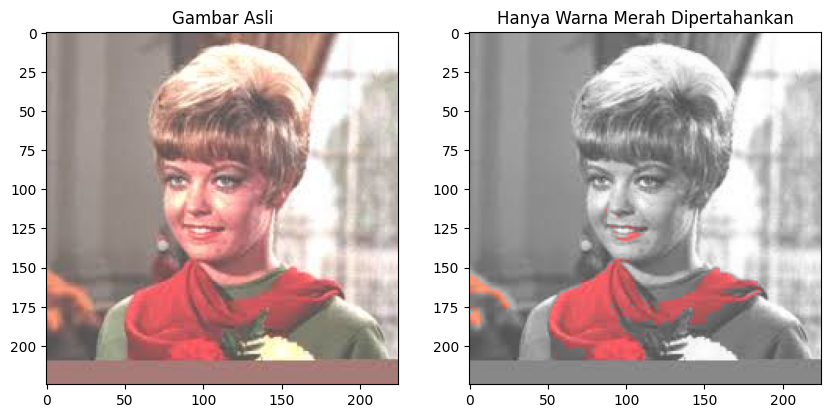

In [35]:
image = cv.imread('/content/drive/MyDrive/PCVK/image/female.jpg')

# Konversi gambar ke ruang warna HSV
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Definisi rentang warna merah dalam ruang warna HSV (terbagi menjadi dua rentang)
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

# Membuat mask untuk mendeteksi warna merah (gabungan dua rentang)
mask_red1 = cv.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv.inRange(hsv_image, lower_red2, upper_red2)
mask_red = mask_red1 + mask_red2

# Mengubah gambar ke grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray_image = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

# Menggabungkan gambar asli dan grayscale berdasarkan mask merah
result = np.where(mask_red[:, :, None] == 255, image, gray_image)

# Konversi gambar dari BGR ke RGB untuk plt.imshow
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)

# Menampilkan hasil menggunakan matplotlib
plt.figure(figsize=(10,5))

# Menampilkan gambar
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title('Hanya Warna Merah Dipertahankan')
plt.axis('on')

# Menampilkan keseluruhan hasil
plt.show()